In [1]:
import pandas as pd
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load CSV
df = pd.read_csv("per_sample_results/kc_house_data_tasks_15_k_10_mode_0.csv")  # hoặc dùng StringIO nếu bạn đọc từ chuỗi

# Lọc dữ liệu thuộc tập train
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]



In [2]:
df_test['method'].value_counts()

method
mean             2303
pooling          2303
shat             2303
sgreedy          2303
random_forest    2303
shat-rf          2303
sgreedy-rf       2303
lightGBM         2303
shat-LGBM        2303
sgreedy-LGBM     2303
polynomial 2     2303
shat-poly        2303
sgreedy-poly     2303
Pooling_GAM      2303
shat-gam         2303
sgreedy-gam      2303
Name: count, dtype: int64

/tmp/ipykernel_755441/1815043613.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mse = grouped.apply(lambda g: np.sqrt(np.mean((g['residual'])**2)))


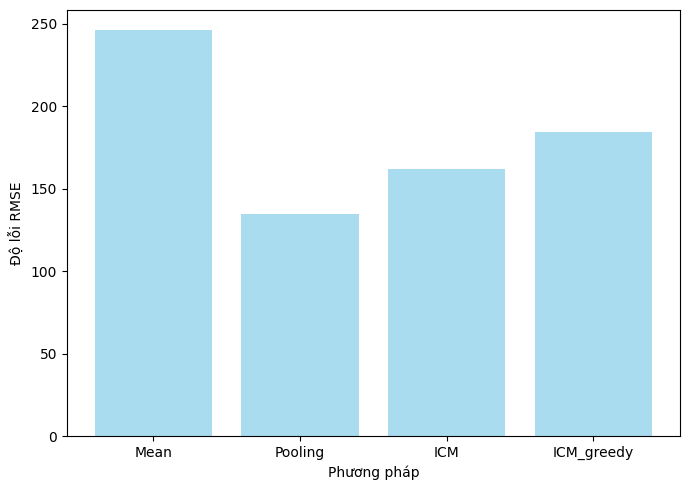

In [11]:
df = pd.read_csv("per_sample_results/kc_house_data_tasks_15_k_10_mode_0.csv")

# Lọc dữ liệu thuộc tập train
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

df_test = df_test[df_test['method'].isin(['mean','pooling', 'shat', 'sgreedy'])]
method_names = ["Mean", "Pooling", "ICM", "ICM_greedy"]
grouped = df_test.groupby('method')

# Tính MSE
mse = grouped.apply(lambda g: np.sqrt(np.mean((g['residual'])**2)))
mse = mse.reindex(['mean','pooling', 'shat', 'sgreedy'])

plt.figure(figsize=(7, 5))
bars = plt.bar(method_names, mse.values, color='skyblue', alpha=0.7)

plt.ylabel("Độ lỗi RMSE")
plt.xlabel("Phương pháp")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("experiment_03_result_01.pdf", format='pdf')

plt.show()


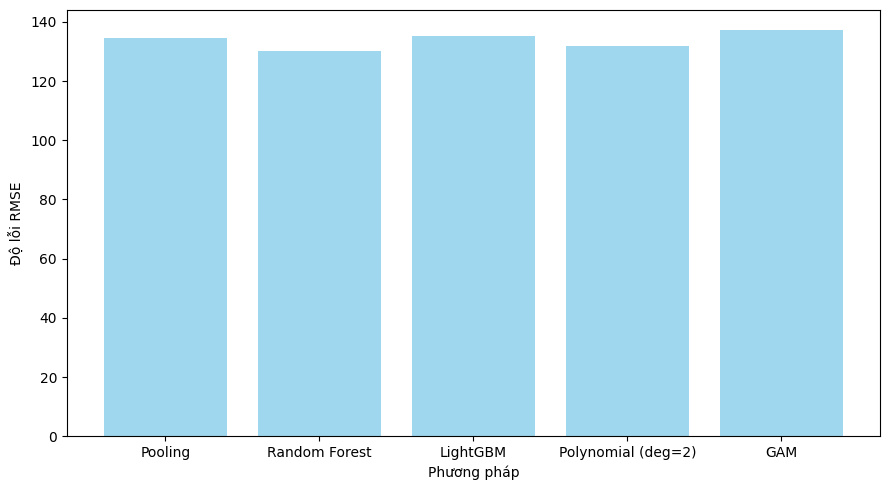

In [ ]:
df = pd.read_csv("per_sample_results/kc_house_data_tasks_15_k_10_mode_0.csv")

df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

df_test = df_test[df_test['method'].isin(['pooling', 'random_forest', 'lightGBM', 'polynomial 2', 'Pooling_GAM'])]

# Tên phương pháp hiển thị tương ứng
method_display_names = {
    'pooling': 'Pooling',
    'random_forest': 'Random Forest',
    'lightGBM': 'LightGBM',
    'polynomial 2': 'Polynomial (deg=2)',
    'Pooling_GAM': 'GAM'
}

# Nhóm theo phương pháp
grouped = df_test.groupby('method')

# Tính MSE
mse = grouped['residual'].apply(lambda g: np.sqrt(np.mean(g**2)))

# Sắp xếp đúng thứ tự mong muốn
method_order = ['pooling', 'random_forest', 'lightGBM', 'polynomial 2', 'Pooling_GAM']
mse = mse.reindex(method_order)

# Lấy tên hiển thị
labels = [method_display_names[m] for m in method_order]

# Tạo biểu đồ MSE
plt.figure(figsize=(9, 5))
bars = plt.bar(labels, mse.values, color='skyblue', alpha=0.8)

plt.ylabel("Độ lỗi RMSE")
plt.xlabel("Phương pháp")
plt.tight_layout()
plt.savefig('experiment_03_result_02.pdf', format='pdf')

plt.show()


/tmp/ipykernel_755441/4270307418.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['method'] = df_test['method'].str.lower()


Số lượng mẫu theo phương pháp:
 method
pooling          2303
shat             2303
sgreedy          2303
random_forest    2303
shat-rf          2303
sgreedy-rf       2303
lightgbm         2303
shat-lgbm        2303
sgreedy-lgbm     2303
polynomial 2     2303
shat-poly        2303
sgreedy-poly     2303
pooling_gam      2303
shat-gam         2303
sgreedy-gam      2303
Name: count, dtype: int64


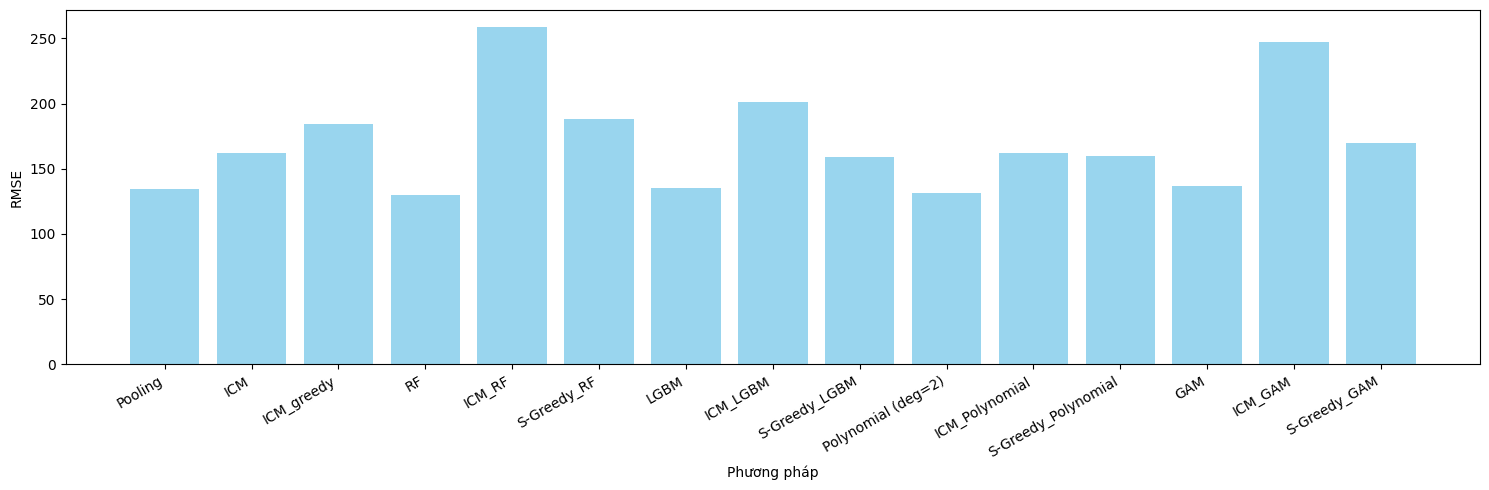

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("per_sample_results/kc_house_data_tasks_15_k_10_mode_0.csv")

# Lọc tập train và test
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

# Đưa các tên phương pháp về dạng chuẩn (viết thường, tránh inconsistency)
df_test['method'] = df_test['method'].str.lower()

# Giữ lại các phương pháp cần hiển thị (chuẩn hóa tên)
methods_to_keep = [
    'pooling', 'shat', 'sgreedy','random_forest', 'shat-rf', 'sgreedy-rf',
    'lightgbm', 'shat-lgbm', 'sgreedy-lgbm',
    'polynomial 2', 'shat-poly', 'sgreedy-poly',
    'pooling_gam', 'shat-gam', 'sgreedy-gam'
]
df_test = df_test[df_test['method'].isin(methods_to_keep)]

# Hiển thị số lượng mẫu theo phương pháp
print("Số lượng mẫu theo phương pháp:\n", df_test['method'].value_counts())

# Đặt tên hiển thị cho từng phương pháp
method_display_names = {
    'pooling': 'Pooling',
    'shat': 'ICM', 
    'sgreedy':'ICM_greedy',

    'random_forest': 'RF',
    'shat-rf': 'ICM_RF',
    'sgreedy-rf': 'S-Greedy_RF',

    'lightgbm': 'LGBM',
    'shat-lgbm': 'ICM_LGBM',
    'sgreedy-lgbm': 'S-Greedy_LGBM',

    'polynomial 2': 'Polynomial (deg=2)',
    'shat-poly': 'ICM_Polynomial',
    'sgreedy-poly': 'S-Greedy_Polynomial',

    'pooling_gam': 'GAM',
    'shat-gam': 'ICM_GAM',
    'sgreedy-gam': 'S-Greedy_GAM',
}

# Tính MSE (hoặc dùng RMSE nếu muốn)
grouped = df_test.groupby('method')
mse = grouped['residual'].apply(lambda g: np.sqrt(np.mean(g**2)))

# Sắp xếp đúng thứ tự như trong method_display_names
methods_sorted = [m for m in method_display_names if m in mse.index]
mse = mse.reindex(methods_sorted)

# Lấy nhãn hiển thị
labels = [method_display_names[m] for m in methods_sorted]

# Vẽ biểu đồ
plt.figure(figsize=(15, 5))
bars = plt.bar(labels, mse.values, alpha=0.85, color='skyblue')

plt.ylabel("RMSE")
plt.xlabel("Phương pháp")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('experiment_03_result_03.pdf', format='pdf')

plt.show()


/tmp/ipykernel_263738/4294720748.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mse = grouped.apply(lambda g: np.mean((g['residual'])**2))


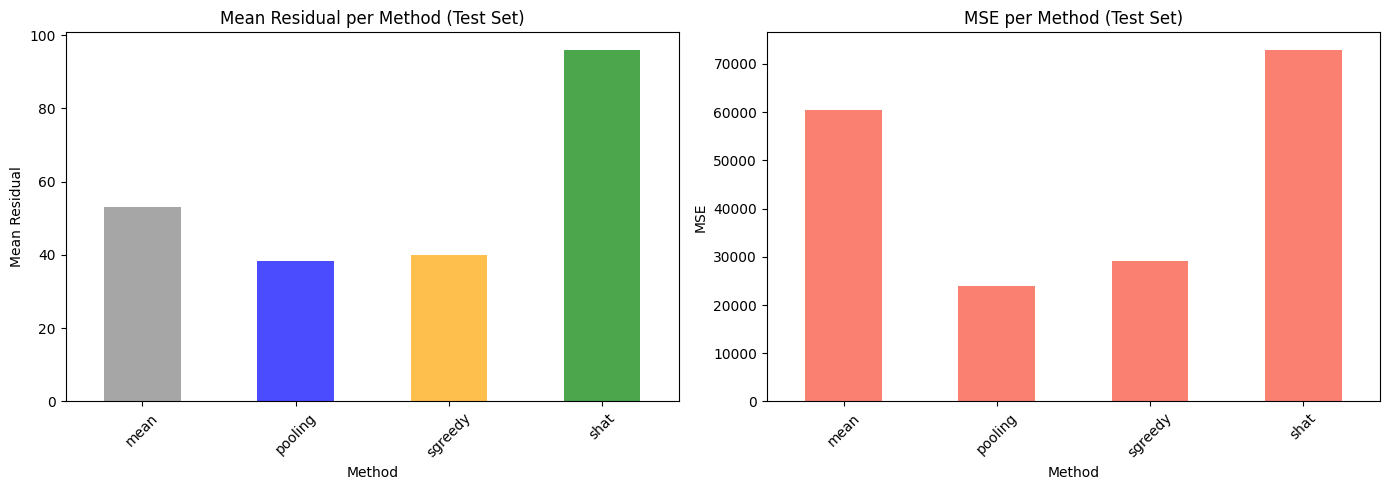

In [3]:
df_test = df_test[df_test['method'].isin(['mean', 'pooling', 'shat', 'sgreedy'])]

# Nhóm theo phương pháp
grouped = df_test.groupby('method')

# Tính toán chỉ số
mean_residual = grouped['residual'].mean()
mse = grouped.apply(lambda g: np.mean((g['residual'])**2))

# Tạo subplots nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharey=False)

# Plot mean residual
mean_residual.plot(kind='bar', ax=axes[0], color=["gray", "blue", "orange", "green"], alpha = 0.7)
axes[0].set_title("Mean Residual per Method (Test Set)")
axes[0].set_ylabel("Mean Residual")
axes[0].set_xlabel("Method")
axes[0].tick_params(axis='x', rotation=45)

# Plot MSE
mse.plot(kind='bar', ax=axes[1], color=["gray", "blue", "orange", "green"], alpha = 0.7 )
axes[1].set_title("MSE per Method (Test Set)")
axes[1].set_ylabel("MSE")
axes[1].set_xlabel("Method")
axes[1].tick_params(axis='x', rotation=45)

# Tối ưu bố cục
plt.tight_layout()
plt.show()

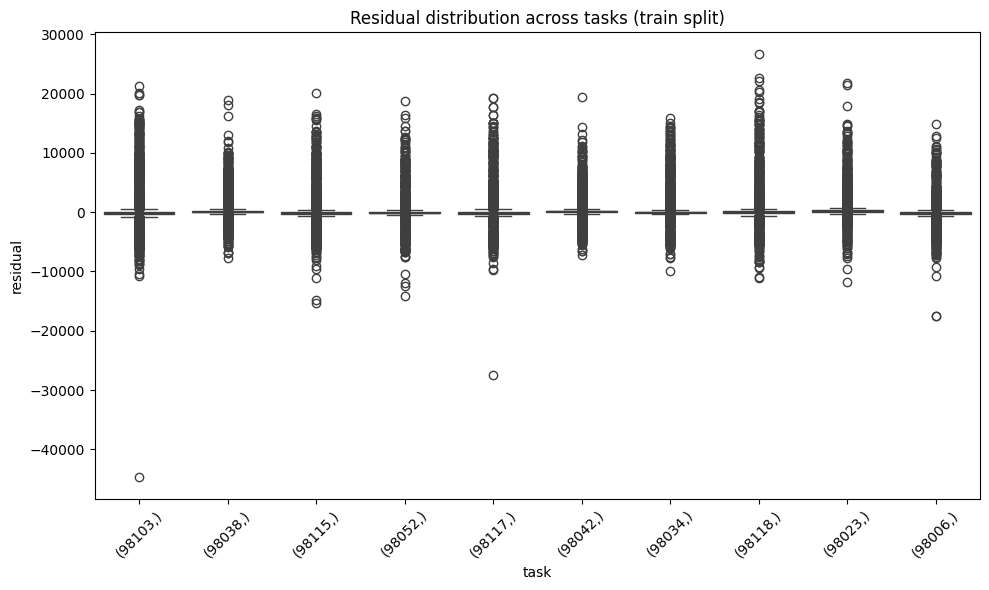

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x="task", y="residual")
plt.title("Residual distribution across tasks (train split)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import f_oneway
f_stat, p = f_oneway(*grouped_residuals)

print(p)

0.0


KS-test p-value: 0.8889


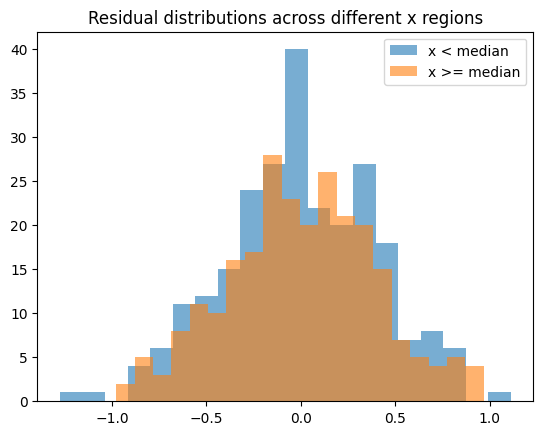

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import ks_2samp

# 1. Sinh dữ liệu phi tuyến
np.random.seed(0)
x = np.random.uniform(-3, 3, 500)
n = np.random.normal(0, 0.5, size=x.shape)
y = np.sin(x) + n  # nonlinear causal model: x → y

# 2. Fit mô hình để học hàm f
model = GradientBoostingRegressor().fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))
residuals = y - y_pred

# 3. Chia x thành 2 miền: x < median và x >= median
median = np.median(x)
group1 = residuals[x < median]
group2 = residuals[x >= median]

# 4. So sánh phân phối phần dư
stat, p_value = ks_2samp(group1, group2)
print(f"KS-test p-value: {p_value:.4f}")

# 5. Vẽ histogram phần dư theo 2 miền
plt.hist(group1, alpha=0.6, label='x < median', bins=20)
plt.hist(group2, alpha=0.6, label='x >= median', bins=20)
plt.legend()
plt.title("Residual distributions across different x regions")
plt.show()
